# Milestone 5. Trade-offs and Interactions of Bias and Discrimination with other verticals in Trustworthy AI

Fairness is just one aspect of what is commonly called "Trustworthy AI". The [European Commision guidelines for Trustworthy AI](https://digital-strategy.ec.europa.eu/en/library/ethics-guidelines-trustworthy-ai) defines a non-exhaustive lists of requirements for trustworthy AI, illustrated on the figure below:

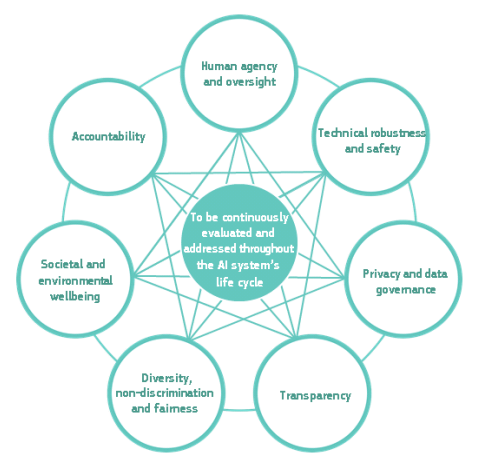

In this milestone, apart from Fairness which is the main subject of the course, we will consider 3 other verticals of trustworthy AI:   
- **Explainability**: Quality of a system to be safe, not vulnerable to tampering.
- **Robustness**: Quality of a system to avoid unfair treatment of individuals or organizations.
- **Privacy**: Quality of a system to provide decisions or suggestions that can be understood by their users and developers.

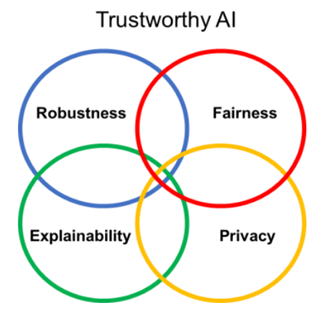
*Image from [Koshiyama et al.,2021](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3778998)*

These subfields of ethical AI are often studied in isolation, but a growing literature is focusing on how they interact with one another. This is a very important field of research as ultimately, a trustworthy AI system needs to adhere to all these principles at once, even though they sometimes contradict each other. This milestone explores some of these interactions. 

# 1. Explainability

Explainability often goes hand in hand with fairness. If one can explain the factors that led to a particular decision, one might be able to detect that this decision was taken in an unfair way. 

## 1.1. A short introduction to Explainability

### 1.1.1. Interpretability and Explainability

Both terms are commonly encountered in AI, and we provide here a definition of both, inspired by [(Linardatos et al., 2021)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7824368/)

*Interpretability* is "the degree to which a human can understand the cause of a decision" ([Miller, 2018](https://arxiv.org/pdf/1706.07269.pdf)). It is linked with the ability to "identify the cause-and-effect relationships within the system’s inputs and outputs" [(Linardatos et al., 2021)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7824368/). 

*Explainability* is the degree to which the inner mechanics of an algorithm are understood by a human. Interpretability is therefore a wider concept than Explainability, and one way to obtain it is through Explainability, but there are other ways.

In the remainder we use the term *Explainability* to refer to both concepts. 

### 1.1.2. Types of Explainability

The figure below by [(Koshiyama et al., 2021)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3778998) presents different types of algorithm explainability. They can be categorised by how model agnostic or specific they are, abd how local or global the explanation is. In the following, we describe Feature Importance, SHAP and LIME, that also feature in the practice notebook.

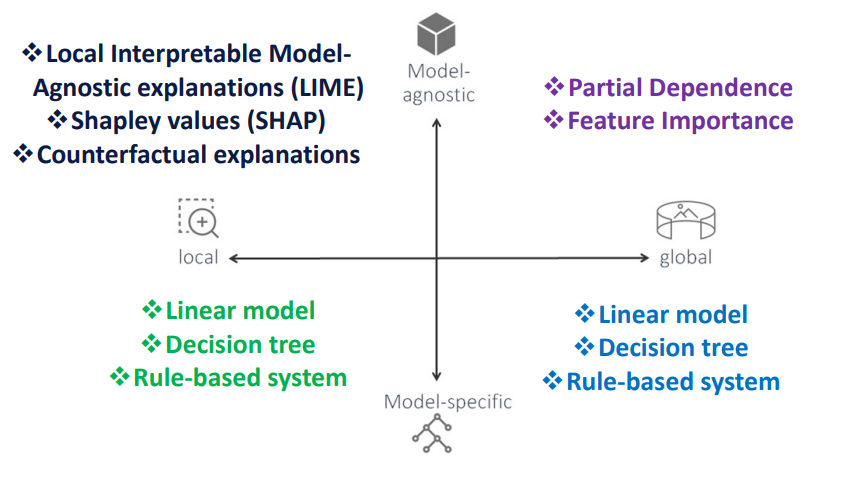
*Figure by [(Koshiyama et al., 2021)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3778998). Types and levels of Algorithm Explainability.*

### 1.1.3. Description of a few methods

#### Feature importance 

Looks to assign a score to each feature relative to its importance in the prediction. There are different methods to perform feature importance depending on the model used, as described in Jason Brownlee's article [How to Calculate Feature Importance With Python](https://machinelearningmastery.com/calculate-feature-importance-with-python/).  For instance, in a simple linear regression, the feature importance can simply be the weight times the feature value. For some more complicated or non-linear models, other model-agnostic methods are needed. One is *Permutation Feature Importance*. Let's call $X$ the feature matrix (each row i is a sample and each column j is a feature) and $e$ the error of the model when predicting for $X$. We calculate the feature imporance of feature j by:
1. Create feature matrix $X_j$ by permuting column j
2. Calculate the new error $e_j$ when predicting for $X_j$ 
3. The feature importance is $FI_j = e_j - e$. 

In other words, we randomly permute the values of one of the features and see how this impact the results. 


#### Shapley values

In a sentence, the shapley value is: "the average marginal contribution of an instance of a feature among all possible coalitions". It is a concept taken from Game Theory. We will quickly illustrate its principle here. For more detailed information, you can refer to [this page](https://christophm.github.io/interpretable-ml-book/shapley.html) which is a section of the book *Interpretable Machine Learning. A Guide for Making Black Box Models Explainable* by Christoph Molnar. 

To develop an intuition of it, we use here an illustration heavily adapted from [this page](https://towardsdatascience.com/tagged/shapley-values?p=5a2a271ed9c3). Imagine we have 4 friends (A,B,C,D) working together for a profit $p$. How can we decide what contribution each person had in order to share the profit fairly? We can see the marginal contribution of person D by calculating the profit with and without them as shown in the figure below.

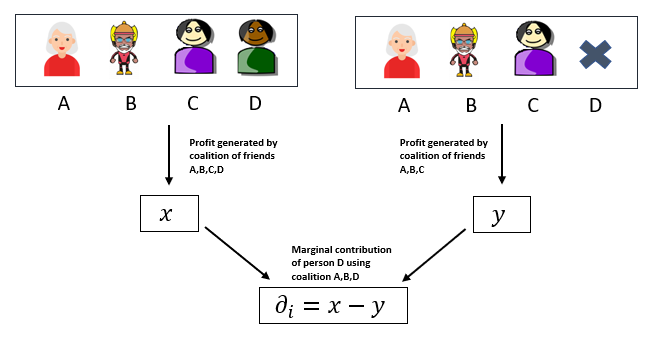


We can do this for "all possible coalitions" as pictured below.
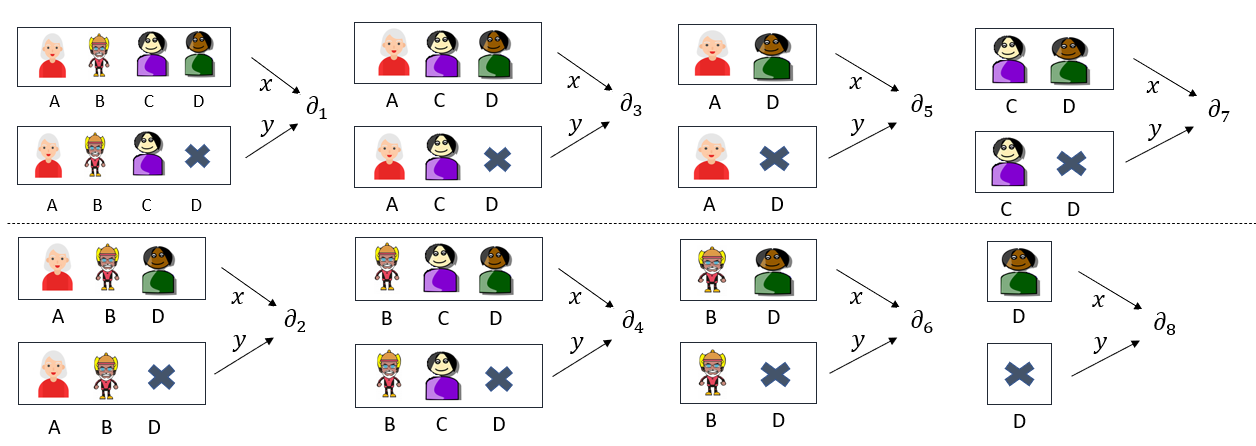


The shapley value for person D is therefore:
$\Phi_D = \frac{\delta_1 + \delta_2 + \delta_3 + \delta_4 + \delta_5 + \delta_6 + \delta_7 + \delta_8}{8}$

However, in a real ML problem, it is not that simple as there are many features, and they may take continuous values. To help with computation, the Shapley only looks at $n$ potential coalitions instead of all of them. 

#### LIME (Local  Interpretable Model-agnostic Explanations)

Without going into the Math, LIME explains each instance. In the practice notebook, where we keep the hiring algorithm as an example, an instance corresponds to a specific candidate's outcome (pass or fail). LIME's steps are:
- For feature vector i (features of candidate i in our case).
- Produces 5,000 samples of it (sampling from a normal distribution for continuous features or from the training distribution for categorical ones). In our hiring example, the features are continuous. 
- Predict the output for these 5,000 new feature vectors using the trained model
- Weigh each of these 5,000 samples according on how close/far they are from the original feature vector i
- Uses a feature selection technique like Lasso to obtain the top important features

A demonstration on how to use the LIME package is provided in the practice notebook on Explainability. For more details, you can refer to the original paper: [“Why Should I Trust You?” Explaining the Predictions of Any Classifier](https://arxiv.org/pdf/1602.04938.pdf) by Ribeiro et al.



## 1.2. Interactions with fairness

Now that we have given an overview of Explainability in Machine Learning, we explore the interactions between Explainability and Fairness. As Explainability gives clarity on the factors that led to a decision, it seems intuitive that it can only help to determine if a decision is fair. As an illustration, the following questions can be answered using Explainability techniques:
- Are the most influential factors reasonable? Are they proxy for a protected characteristics?
- Are the influential factors the same across different groups ?
- Is the model relying too much on one feature?

In addition, explainability techniques can be used to explain directly the chosen fairness metric rather than the accuracy. For example, we can use permutation feature importance to assess the impact of each feature on Disparate Impact, hence unveiling which features are the most responsible for any potential observed bias. 

# 2. Privacy

## 2.1. A short introduction to Privacy

Privacy is a key aspects of algorithms, and one that historically gained the most attention. Algorithms must guarantee data protection throughout a system’s entire lifecycle, whether this is user information provided by the user or generated by the system.

We split the privacy risk in two: 

- attackers that gain access to the training data. Typical defense occurs through minimization and anonymization of the data. 
- attackers that try to recover the data having access to the model (white box) and/or that can access it as a black-box only. We will explore what kind of attacks can occur in this case and a widely adopted defense called Differential Privacy. 

The following table gives a (non-exhaustive) overview of the privacy threats and possible defenses throughouth the system's lifecycle. 

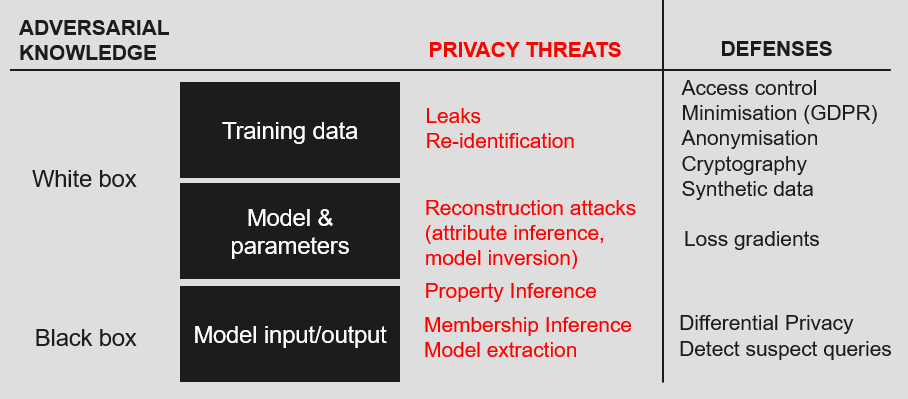

### 2.1.1. When access to training data

The first defense against data hacking is good access control and good software and hardware security. If however attackers were to access the data, the risk of privacy breach is minimised thanks to a few common practice. The first one is data minimisation, which is a GDPR principle and states that only essential data should be stored and used. However in Machine Learning, data is a key raw material and some sensitive data will be deemed at esential for various applications. The next step is anonymisation. We present here a few known anonymisation techniques.

There are 3 sorts of data points:
- Personally Identifiable Information (PII): uniquely identify someone (full name, social security number, etc.)
- Quasi-identifiers (QI): can be attributable to more than one indiviuals (age, gender,etc.)
- Sensitive attributes: attributes that are sensitive and should remain private.

One QI is usually not enough to re-identify someone, but a combination of those with potentially some other available public data might make it possible. De-identification techniques consisting only of removing PIIs proved not enough in many cases, and there are some famous examples of re-identification. [This article](https://luminovo.ai/blog/data-privacy-in-machine-learning) provides a few. 

#### k-anonymity, l-diversity and t-closeness
Traditionally, different anonymisation techniques have been used such as k-anonymity, l-diversity or t-closeness. 
- k-anonymity states that there should at least be k records (i.e. rows) with the exact same attributes. Note that the only attributes that we need to be the same are only the QIs that would enable re-identification when combined together or with external sources. The clusters formed this way are called *equivalence classes*. There are some limitations with this technique, notably if one manages to find out to which equivalence class an individual belong and all individuals from that class have the same sensitive attribute, then the sensitive attribute for that individual is known. This is illustrated in the k-anonymity column of the example below (where the sensitive attribute is the salary and the QI anonymised the zip code). l-diversity and t-closeness are extensions of k-anonymity that deal with this issue. 
- In l-diversity, there must be at least l different values for the sensitive attribute in one equivalence class. However, if all the values of an equivalence class are low, then the membership to the equivalence class reveals that the individual has a low salary (as in the example below).  
- In t-closeness, there is the additional constraints that the different values of the sensitive attributes should follow the same distribution as the whole data to avoid that problem. 

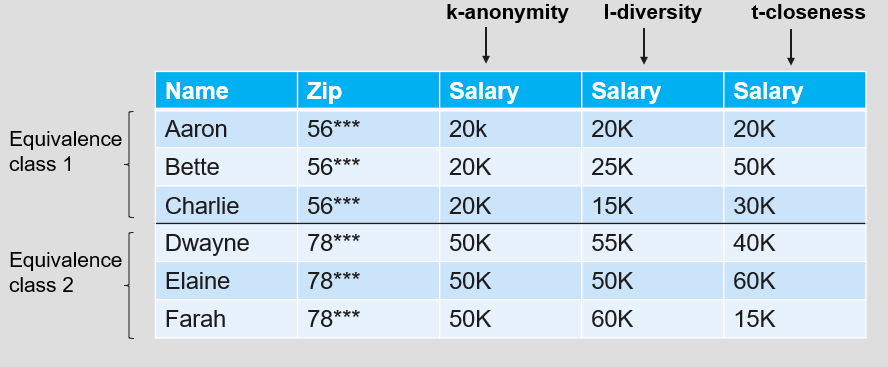

In the context of machine learning where the number of features can be huge, it can become quite complex to apply these techniques. Indeed, feature vectors become sparse and clustering them into equivalence class may heavily distort the data. Also, how can one make sure that the list of features to be anonymised is complete?

### 2.2.2. Attacker with no data access but white-box or black-box access

Even if the attacker has no direct access to the training data, there are ways they can infer information about the training data. Based on the survey by Rigaki and Garcia: [A Survey of Privacy Attacks in Machine Learning](https://arxiv.org/pdf/2007.07646.pdf), we give an overview of the privacy threats that a machine learning model is subject to:
- *Membership inference:* the most studied type of attack. The question one is looking to answer is: Is this sample of a member of the population part of the training sample. This type of attack is possible because of overfitting: the model reacts differently towards training data than towards new unseen data, and this can be exploited by an attacker to answer that question. This type of attack gets a lot of attention from researchers. A widely adopted defense to avoid such attacks is ***Differential Privacy*** that we will describe in more details below.
- *Reconstruction attacks:* These are also referred to as model inversion or attribute inference attacks. They consist in either:
    - Infer class (sensitive) attributes given other features or external information
    - Create class representatives
    They can be whitebox or blackbox. Some actually attempt to reconstruct the real training data, whilst some other can just create broad class representatives with "typical" class attributes. Usually, this type of attack require access to the loss gradients during training. Typical defense studied hence involve controlling the amount of information an attacker can infer from these loss gradients.  
- *Property inference:* The attacker infer global properties of the training data that were never explicitely meant to be. Most of the time this requires model access (whitebox). For instance, the attacker might infer the ratio of men to women in the dataset. There is no one-fit-all defense for this and some of these attacks may be unavoidable. 
- *Model Extraction attacks:* The attacker has blackbox access and creates a substitute for the model. This is usually achieved by repetitevly querying the model for a range of inputs until they can work out its behaviour. Although these kinds of attacks do not directly aim for the training dataset, the knowledge of the model can then help carry other types of attacks. Defending against this type of attacks often involve monitoring the types of queries performed by users.  

The following contains a lot of different resources on the subject: https://github.com/stratosphereips/awesome-ml-privacy-attacks

The 4 types of attacks are summarised in the figure below.

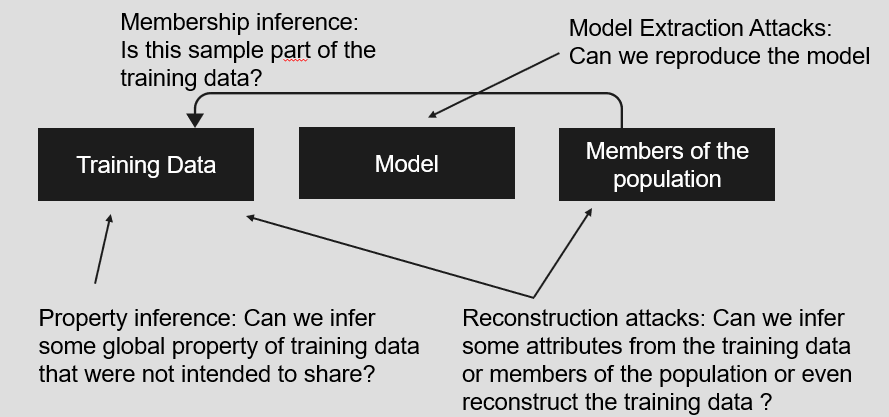

#### Differential Privacy
As mentioned before, ef all of the described attacks, the one that gets the most attention from researchers is membership inference. A widely adopted defense to avoid such attacks is ***Differential Privacy*** (DP). 

DP gives statistical guarantee that the contribution of any individual row in the dataset cannot be detected in the output. This is usually achieved by adding noise during training. Hence, it becomes statistically impossible for an attacker to determine if a particular individual has been used in training. Indeed, the outcomes should be *too similar* for a model trained on a dataset or on this same dataset but excluding any particular individual. 

This is illustrated below: 

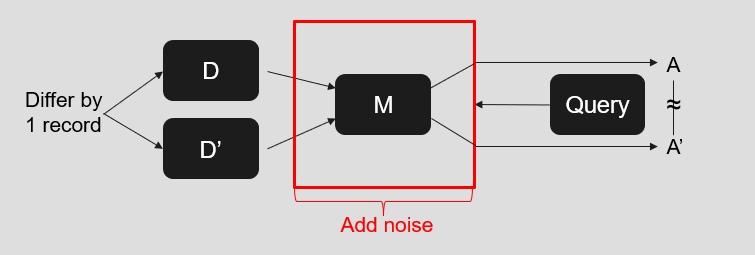

You can once again refer to [this article](https://luminovo.ai/blog-posts/data-privacy-in-machine-learning) for more details. The original paper by Cynthia Dwork is available [here](http://www.dbis.informatik.hu-berlin.de/fileadmin/lectures/SS2011/VL_Privacy/Differential_Privacy.pdf).

## 2.2. Trade-offs between Privacy and Fairness

Now that we have given an overview of privacy in Machine Learning, we're interested in how it interacts with fairness. 

In Milestones 3 and 4, we have seen how the knowledge of protected characteristics was essential when measuring and mitigating fairness. These protected characteristics highly overlap with sensitive information and are quasi-identifiers that could help re-identification attacks. The minimisation principle would dictate to not store these, but the fairness field requires the opposite, and there is a direct trade-offs to be made here. 

#### Fairness and Differential Privacy
Several studies also show how the application of Differential Privacy may be at odds with fairness. We list here three papers of interest with their main findings: 
- [[Pujol et al., 2020]](https://arxiv.org/pdf/1905.12744.pdf): Adding noise for DP may impact some groups more than others 
-  [[Chang & Shokri, 2021]](https://arxiv.org/pdf/2011.03731.pdf): “fair algorithms tend to memorize data from the under-represented subgroups, while trying to equalize the model’s error across groups”
- [[Agarwal, 2021]](https://crcs.seas.harvard.edu/files/crcs/files/ai4sg-21_paper_23.pdf) shows an incompatibility theorem: "one cannot design an accurate learning algorithm that is both $\epsilon$-differentially private and fair" and claims that trade-offs are necessary.

#### Privacy and model transparency
Finally, we have seen how access to the model can leak information about the training data. This is directly at odds with the principles of explainability and model transparency, which we have seen can be used as a tool to help determine the fairness of a model. 

# 3. Robustness
## 3.1. Intro to Robustness

According to the [European Comission AI ethics guidelines for Trustworthy AI](https://digital-strategy.ec.europa.eu/en/library/ethics-guidelines-trustworthy-ai), Robustness and Safety comprises the 4 following subrequirements:
- *Resilience to attack and security*: Systems (data, model and underlying infrastructure, both software and hardware) should be protected against adversarial attacks, i.e. hacking, data poisoning, model leakage,...As an example, two common attacks are: (i) *Evasion attacks*: consist of manipulating input data to evade a trained classifier at test time, (ii) *Poisoning attacks*: aim to increase the number of misclassified samples at test time by injecting a small fraction of poisoning samples into the training data (occur during the training phase). Many of the measures required to ensure that resilience will be linked with secure and safe hardwares and softwares, looking at the entire system's infrastructure rather than the technicalities of the model only. But if we focus on the model itself, Robustness is commonly linked with the idea that small changes in the input data should lead to small changes in the output. A famous example of attacks leading to misclassification that uses small changes in the input is given by Goodfellow et al. in [Explaining and Harnessing Adversarial Examples](https://arxiv.org/pdf/1412.6572.pdf): by adding some noise to the image of a panda, the model recognises the panda as a gibbon with high confidence. [This article](https://towardsdatascience.com/why-robustness-is-not-enough-for-safety-and-security-in-machine-learning-1a35f6706601) is a simple read and a good introduction to the subject of Robustness. For more details on the different attacks and possible defenses, one can also refer to [this paper](https://arxiv.org/pdf/2012.10544.pdf).

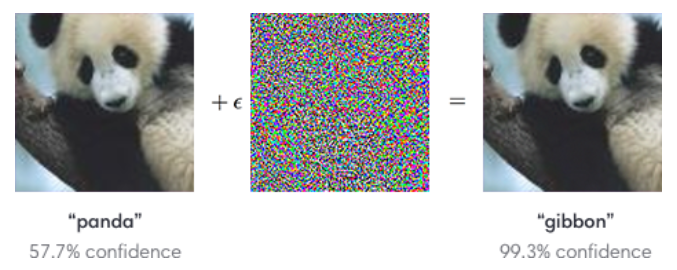
<center><i>From Goodfellow et al., Explaining and Harnessing Adversarial Examples</i></center>

- *Fallback plan and general safety*: "AI systems should have safeguards that enable a fallback plan in case of problems." This means that systems should be able to continue their critical operation if the main system was to fail, in a safe way. This may for instance include human-in-the-loop verifications or switching to a rule-based system. 
- *Accuracy*: "Ability to make correct judgements, for example to correctly classify information into the proper categories, or its ability to make correct predictions, recommendations, or decisions based on data or models." The system should have a high accuracy. 
- *Reliability and Reproducibility*: "A reliable AI system is one that works properly with a range of inputs and in a range of situations. [...] Reproducibility describes whether an AI experiment exhibits the same behaviour when repeated under the same conditions.". This means that the system should work for all possible inputs and the outcome should be the same when it is given the same input. 

## 3.2. Robustness and Fairness

In this section, we will see how Robustness and Fairness interact. 

### Bias vs Accuracy

The most famous interaction is the one of bias vs accuracy. Typically, models are optimized with accuracy in mind, and adding an additional constraint on bias will most of the time decrease accuracy. The problem becomes finding a good trade-off, where both accuracy and fairness are at reasonable levels. This trade-off is illustrated in the figure below from [[Koshiyama et al., 2021]](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3778998), where the fairness metric used is Statistical Parity. The blue dots are the trained models under different constraints and parameters/hyperparameters settings The space of feasible models (with both acceptable performance and fairness) is shown in green. 

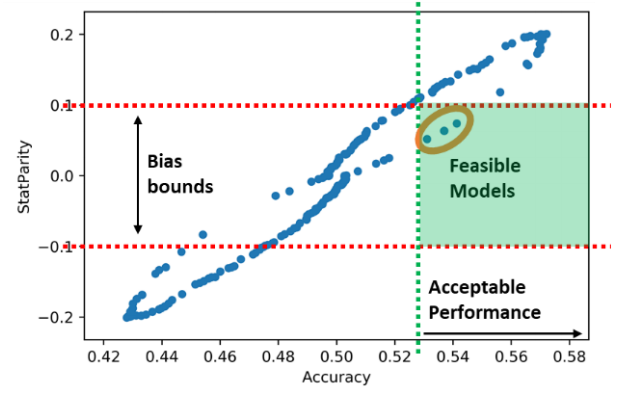
<center><i>Koshiyama et al., Towards Algorithm Auditing</i></center>

### Explainability vs Accuracy
As good explainability/interpretability is associated with a greater insight into fairness of the model, we also explore the interaction between explainability and accuracy. Typically, more complex models will have a greater accuracy, but lower explainability. This is not always true as there could be situation where a simple linear regression will be the most accurate. Additionally, linear regression could have very low explainability if the features used are hugely pre-processed in some obscure way. But the general trend holds and this figure from [[Koshiyama et al., 2021]](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3778998) illustrates this. 

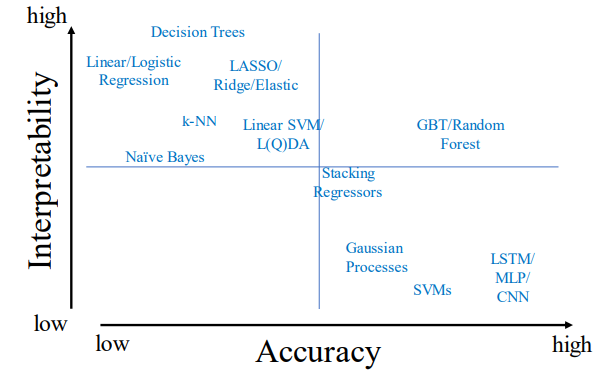
<center><i>Koshiyama et al., Towards Algorithm Auditing</i></center>